In [72]:
import pandas as pd
df = pd.read_csv('ChatGPT.csv')

In [73]:
pd.to_datetime(df['Date'])

0        2023-01-29 15:08:03+00:00
1        2023-01-29 15:07:59+00:00
2        2023-01-29 15:07:38+00:00
3        2023-01-29 15:06:53+00:00
4        2023-01-29 15:06:18+00:00
                    ...           
179247   2022-11-30 18:33:33+00:00
179248   2022-11-30 18:31:23+00:00
179249   2022-11-30 18:26:58+00:00
179250   2022-11-30 18:22:04+00:00
179251   2022-11-30 18:13:41+00:00
Name: Date, Length: 179252, dtype: datetime64[ns, UTC]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179252 entries, 0 to 179251
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             179252 non-null  object
 1   Tweet            179252 non-null  object
 2   Url              179252 non-null  object
 3   User             179252 non-null  object
 4   UserCreated      179252 non-null  object
 5   UserVerified     179252 non-null  bool  
 6   UserFollowers    179252 non-null  int64 
 7   UserFriends      179252 non-null  int64 
 8   Retweets         179252 non-null  int64 
 9   Likes            179252 non-null  int64 
 10  Location         135379 non-null  object
 11  UserDescription  170364 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 15.2+ MB


In [75]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\83688\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
df["Tweet"] = df["Tweet"].apply(clean)

In [77]:
df["Tweet"].head()

0    hubbi keep say tri chatgpti should'v known wou...
1    ive wait  chatgpt open back ask common radmyth...
2                    chatgpt thank u pitch deck bullet
3    tune next episod ban regul social media app ti...
4       ai trainer  underpaid human annotatorschatgpt 
Name: Tweet, dtype: object

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tweet = " ".join(i for i in df.Tweet)

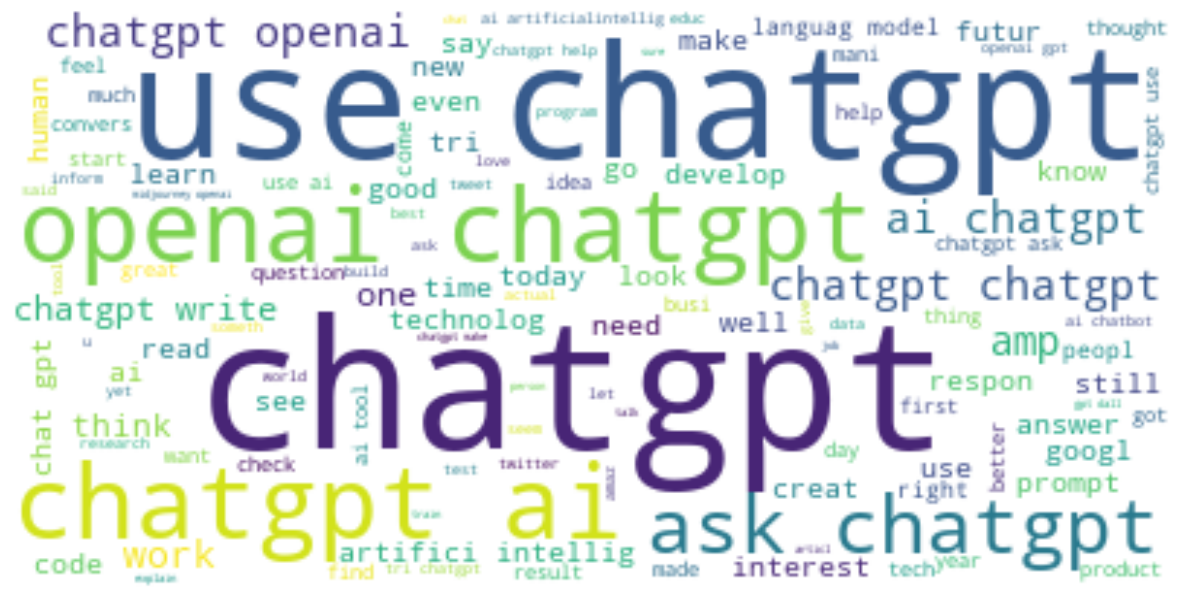

In [79]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Tweet"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["Tweet"]]
df['Tweet'].head()

0    hubbi keep say tri chatgpti should'v known wou...
1    ive wait  chatgpt open back ask common radmyth...
2                    chatgpt thank u pitch deck bullet
3    tune next episod ban regul social media app ti...
4       ai trainer  underpaid human annotatorschatgpt 
Name: Tweet, dtype: object

In [81]:
df.head()

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,UserDescription,Positive,Negative,Neutral,Compound
0,2023-01-29 15:08:03+00:00,hubbi keep say tri chatgpti should'v known wou...,https://twitter.com/heyandriadaily/status/1619...,heyandriadaily,2021-11-18 00:15:55+00:00,False,1,0,0,0,USA,Intentional living - occasional luxuries - hea...,0.242,0.000,0.758,0.6249
1,2023-01-29 15:07:59+00:00,ive wait chatgpt open back ask common radmyth...,https://twitter.com/_doc_oc/status/16197139759...,_doc_oc,2022-02-08 01:15:45+00:00,False,24,144,0,0,Texas Medical Center,☢️ B.S. Nuclear Engineering \n🩺⚙️ Texas A&M E...,0.364,0.000,0.636,0.7430
2,2023-01-29 15:07:38+00:00,chatgpt thank u pitch deck bullet,https://twitter.com/nikoonya/status/1619713889...,nikoonya,2011-01-10 16:24:18+00:00,False,311,167,0,0,"Kansas City, MO",Cofounder @uvavault | Multi-collector of @veef...,0.385,0.000,0.615,0.3612
3,2023-01-29 15:06:53+00:00,tune next episod ban regul social media app ti...,https://twitter.com/CSOonline/status/161971369...,CSOonline,2009-03-16 12:25:05+00:00,True,62409,816,0,0,Boston area,"From @FoundryIDG -- #CSO provides news, analys...",0.175,0.126,0.699,0.1027
4,2023-01-29 15:06:18+00:00,ai trainer underpaid human annotatorschatgpt,https://twitter.com/OmaymaS_/status/1619713552...,OmaymaS_,2009-12-13 15:58:13+00:00,False,1199,786,0,0,NaN,#datascience #machinelearning #rstats #python...,0.000,0.000,1.000,0.0000


In [82]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,UserDescription,Positive,Negative,Neutral,Compound,Sentiment
0,2023-01-29 15:08:03+00:00,hubbi keep say tri chatgpti should'v known wou...,https://twitter.com/heyandriadaily/status/1619...,heyandriadaily,2021-11-18 00:15:55+00:00,False,1,0,0,0,USA,Intentional living - occasional luxuries - hea...,0.242,0.000,0.758,0.6249,Positive
1,2023-01-29 15:07:59+00:00,ive wait chatgpt open back ask common radmyth...,https://twitter.com/_doc_oc/status/16197139759...,_doc_oc,2022-02-08 01:15:45+00:00,False,24,144,0,0,Texas Medical Center,☢️ B.S. Nuclear Engineering \n🩺⚙️ Texas A&M E...,0.364,0.000,0.636,0.7430,Positive
2,2023-01-29 15:07:38+00:00,chatgpt thank u pitch deck bullet,https://twitter.com/nikoonya/status/1619713889...,nikoonya,2011-01-10 16:24:18+00:00,False,311,167,0,0,"Kansas City, MO",Cofounder @uvavault | Multi-collector of @veef...,0.385,0.000,0.615,0.3612,Positive
3,2023-01-29 15:06:53+00:00,tune next episod ban regul social media app ti...,https://twitter.com/CSOonline/status/161971369...,CSOonline,2009-03-16 12:25:05+00:00,True,62409,816,0,0,Boston area,"From @FoundryIDG -- #CSO provides news, analys...",0.175,0.126,0.699,0.1027,Positive
4,2023-01-29 15:06:18+00:00,ai trainer underpaid human annotatorschatgpt,https://twitter.com/OmaymaS_/status/1619713552...,OmaymaS_,2009-12-13 15:58:13+00:00,False,1199,786,0,0,NaN,#datascience #machinelearning #rstats #python...,0.000,0.000,1.000,0.0000,Neutral


In [83]:
print(df["Sentiment"].value_counts())

Neutral     78197
Positive    75214
Negative    25841
Name: Sentiment, dtype: int64
